In [ ]:
# !pip install tensorflow tensorflow-datasets seaborn scikit-learn

In [5]:
# These are the essential libraries we'll use for data processing and visualization
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Mount Google Drive (if you want to save results)
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Let's load the famous Iris dataset! 🌸
print("Loading the Iris dataset...")
dataset, info = tfds.load('iris', with_info=True, as_supervised=True)

Loading the Iris dataset...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/iris/incomplete.CHAXWA_2.1.0/iris-train.tfrecord*...:   0%|          | 0/1…

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.1.0. Subsequent calls will reuse this data.


In [8]:
# Convert to DataFrame
df = tfds.as_dataframe(dataset['train'], info)
print("\nFirst few rows of our dataset:")
df.head()


First few rows of our dataset:


,features,label
0,"[5.1, 3.4, 1.5, 0.2]",0
1,"[7.7, 3.0, 6.1, 2.3]",2
2,"[5.7, 2.8, 4.5, 1.3]",1
3,"[6.8, 3.2, 5.9, 2.3]",2
4,"[5.2, 3.4, 1.4, 0.2]",0


In [12]:
# Extract features from 'features' column
df['sepal_length'] = df['features'].apply(lambda x: x[0])
df['sepal_width'] = df['features'].apply(lambda x: x[1])
df['petal_length'] = df['features'].apply(lambda x: x[2])
df['petal_width'] = df['features'].apply(lambda x: x[3])

print("\nFirst few rows of our dataset:")
df.head()


First few rows of our dataset:


,features,label,sepal_length,sepal_width,petal_length,petal_width
0,"[5.1, 3.4, 1.5, 0.2]",0,5.1,3.4,1.5,0.2
1,"[7.7, 3.0, 6.1, 2.3]",2,7.7,3.0,6.1,2.3
2,"[5.7, 2.8, 4.5, 1.3]",1,5.7,2.8,4.5,1.3
3,"[6.8, 3.2, 5.9, 2.3]",2,6.8,3.2,5.9,2.3
4,"[5.2, 3.4, 1.4, 0.2]",0,5.2,3.4,1.4,0.2


In [13]:
# Prepare features and labels
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['label'].values

In [14]:
# Split dataset
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Splitting dataset...


In [15]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# One-hot encode labels
y_train = tf.one_hot(y_train, depth=3)
y_test = tf.one_hot(y_test, depth=3)

In [17]:
# Display shapes
print("\nData shapes after preprocessing:")
print(f"Training features: {X_train.shape}")
print(f"Testing features: {X_test.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Testing labels: {y_test.shape}")


Data shapes after preprocessing:
Training features: (120, 4)
Testing features: (30, 4)
Training labels: (120, 3)
Testing labels: (30, 3)


In [18]:
# Prepare data for visualization
df_train = pd.DataFrame(
    X_train,
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)
df_train['label'] = tf.argmax(y_train, axis=1).numpy()

<Figure size 1000x800 with 0 Axes>

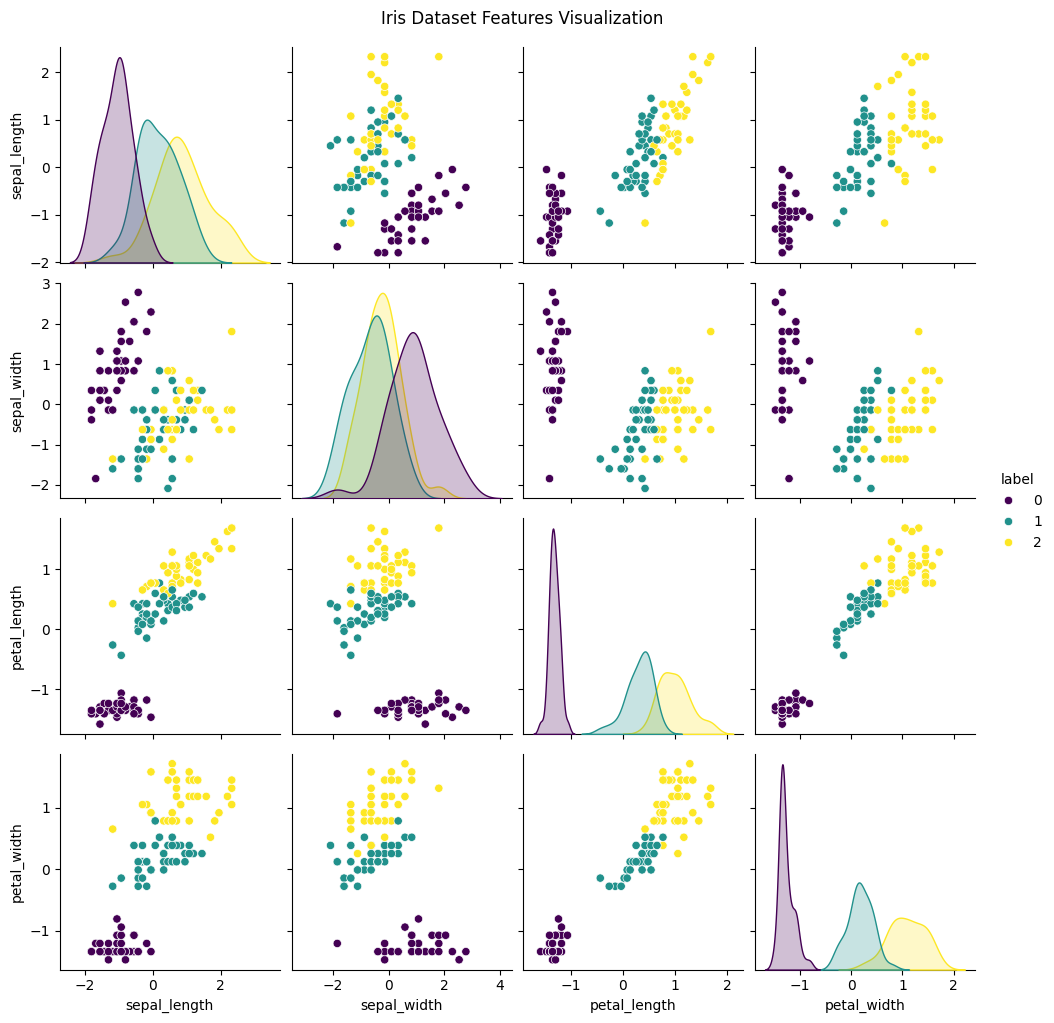

In [19]:
# Create pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df_train, hue='label', palette='viridis')
plt.suptitle("Iris Dataset Features Visualization", y=1.02)
plt.show()

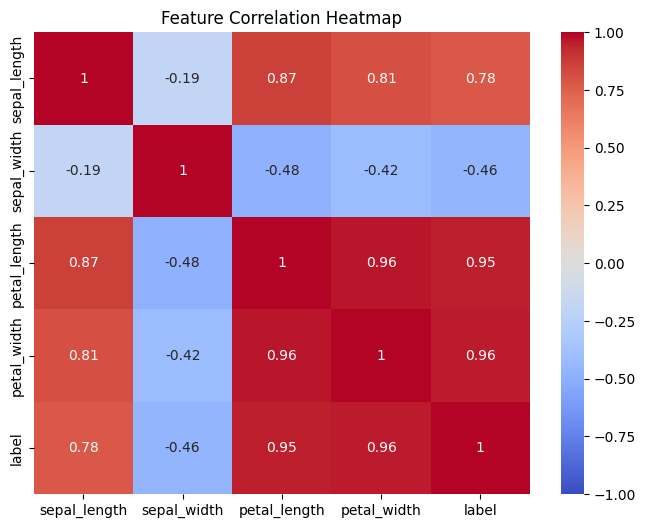

In [20]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
# Save to Google Drive
SAVE_PATH = '/content/drive/MyDrive/ML_Projects/iris_data'

In [22]:
# Create directory if it doesn't exist
!mkdir -p {SAVE_PATH}

# Save preprocessed data
np.savez_compressed(
    f'{SAVE_PATH}/processed_data.npz',
    X_train=X_train,
    X_test=X_test,
    y_train=y_train.numpy(),
    y_test=y_test.numpy()
)

In [23]:
# Function to load data (can be used in other notebooks)
def load_processed_data(path=SAVE_PATH):
    """Load the preprocessed data and return as TensorFlow tensors"""
    data = np.load(f'{path}/processed_data.npz')
    return (
        data['X_train'],
        data['X_test'],
        tf.convert_to_tensor(data['y_train']),
        tf.convert_to_tensor(data['y_test'])
    )

print("✨ All done! Your data is preprocessed and saved to Google Drive!")

✨ All done! Your data is preprocessed and saved to Google Drive!


In [25]:
# Test loading the saved data (optional)
# Uncomment to test
"""
X_train, X_test, y_train, y_test = load_processed_data()
print("Data loaded successfully!")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")
"""

Data loaded successfully!
Training data shape: (120, 4)
Testing data shape: (30, 4)
Training labels shape: (120, 3)
Testing labels shape: (30, 3)
